In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Define source and destination paths
source_path = '/content/drive/MyDrive/data/Final Project /Data.zip'
destination_path = '/content/Data.zip'

# Copy the file
shutil.copy(source_path, destination_path)

print(f'File copied from {source_path} to {destination_path}')


File copied from /content/drive/MyDrive/data/Final Project /Data.zip to /content/Data.zip


In [ ]:
!unzip '/content/Data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Mobile-Phones/Samsung/1638064507831_Samsung Galaxy M21 Used for sale.jpg  
  inflating: Mobile-Phones/Samsung/1639531631924_Samsung Galaxy S9 64GB Used for sale.jpg  
  inflating: Mobile-Phones/Samsung/1636400144518_Samsung Galaxy A50 4GB 64GB New for sale.jpg  
  inflating: Mobile-Phones/Samsung/1636620837963_Samsung Galaxy S20FE 128GB Used for sale.jpg  
  inflating: Mobile-Phones/Samsung/1636615987614_Samsung Galaxy J1 Nxt Used for sale.jpg  
  inflating: Mobile-Phones/Samsung/1638060537529_Samsung Galaxy A10s Used for sale.jpg  
  inflating: Mobile-Phones/Samsung/1638392677016_Samsung Galaxy S8 64GB Used for sale.jpg  
  inflating: Mobile-Phones/Samsung/1639537047435_Samsung Galaxy A03s 464 New for sale.jpg  
  inflating: Mobile-Phones/Samsung/1636628296851_Samsung Galaxy A51 128GB New for sale.jpg  
  inflating: Mobile-Phones/Samsung/1635054024017_Samsung Galaxy J7 SMJ700F Used for sale.jpg  
  inflating: Mobile-Phone

In [ ]:
import os
from PIL import Image

# Paths to the Soda Drinks directories
Miranda_dir = '/content/Soda-drinks/Miranda'
Pepsi_dir = '/content/Soda-drinks/Pepsi'
Seven_Up_dir = '/content/Soda-drinks/Seven-up'


# Initialize variables to store information
file_extensions = {'Pepsi': [], 'Miranda': [], 'Seven Up':[]}
image_shapes = {'Pepsi': [], 'Miranda': [], 'Seven Up':[]}
image_sizes = {'Pepsi': [], 'Miranda': [], 'Seven Up':[]}

# Function to explore images in a directory
def explore_images(directory, label):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                # Get file extension
                ext = filename.split('.')[-1].lower()
                file_extensions[label].append(ext)

                # Get image shape
                shape = img.size  # (width, height)
                image_shapes[label].append(shape)

                # Get image size in bytes
                size = os.path.getsize(file_path)
                image_sizes[label].append(size)
        except Exception as e:
            print(f"Could not process file {file_path}: {e}")

# Explore Pepsi images
explore_images(Pepsi_dir, 'Pepsi')

# Explore Miranda images
explore_images(Miranda_dir, 'Miranda')

# Explore Seven Up images
explore_images(Seven_Up_dir, 'Seven Up')

# Display the results
print(f"Pepsi Image Extensions: {set(file_extensions['Pepsi'])}")
print(f"Miranda Image Extensions: {set(file_extensions['Miranda'])}")
print(f"Seven Up Image Extensions: {set(file_extensions['Seven Up'])}")

print(f"Pepsi Image Shapes: {set(image_shapes['Pepsi'])}")
print(f"Miranda Image Shapes: {set(image_shapes['Miranda'])}")
print(f"Seven Up Image Shapes: {set(image_shapes['Seven Up'])}")


print(f"Pepsi Image Sizes (min, max): {min(image_sizes['Pepsi'])} bytes, {max(image_sizes['Pepsi'])} bytes")
print(f"Miranda Image Sizes (min, max): {min(image_sizes['Miranda'])} bytes, {max(image_sizes['Miranda'])} bytes")
print(f"Seven Up Image Sizes (min, max): {min(image_sizes['Seven Up'])} bytes, {max(image_sizes['Seven Up'])} bytes")


Pepsi Image Extensions: {'jpg'}
Miranda Image Extensions: {'png', 'webp', 'jpeg', 'jpg'}
Seven Up Image Extensions: {'png', 'jpeg', 'jfif', 'jpg', 'gif', 'webp'}
Pepsi Image Shapes: {(230, 270), (4224, 5632)}
Miranda Image Shapes: {(206, 244), (205, 246), (640, 640), (1984, 1984), (700, 700), (1200, 1200), (300, 300), (144, 351), (201, 251), (203, 248), (199, 253), (554, 554), (259, 194), (185, 272), (500, 885), (701, 701), (550, 550), (267, 189), (864, 1390), (1093, 1600), (166, 304), (442, 550), (371, 136), (299, 168), (256, 197), (262, 192), (245, 206), (1280, 852), (291, 173), (500, 951), (433, 577), (400, 400), (298, 169), (460, 460), (300, 450), (1080, 1080), (281, 180), (4000, 3000), (800, 800), (372, 539), (163, 310), (293, 172), (391, 500), (650, 650), (149, 338), (250, 250), (1500, 884), (161, 312), (480, 410), (800, 500), (1050, 1050), (190, 265), (275, 309), (201, 250), (2304, 4608), (221, 228), (224, 224), (1024, 768), (500, 500), (282, 250), (1460, 1500), (371, 679), (102

In [ ]:
# Count the number of images in each class
num_Pepsi_images = len(os.listdir(Pepsi_dir))
num_Miranda_images = len(os.listdir(Miranda_dir))
num_Seven_Up_images = len(os.listdir(Seven_Up_dir))

num_Pepsi_images, num_Miranda_images, num_Seven_Up_images

(540, 297, 421)

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import os
from PIL import Image

# Define dataset path
data_dir = '/content/Soda-drinks'


def convert_to_rgb(image):
    """
    Converts 'P' mode images with transparency to 'RGBA', and then to 'RGB'.
    This is to avoid transparency issues during model training.
    """
    if image.mode in ('P', 'RGBA'):
        return image.convert('RGB')
    return image

# Update the transformations for both training and validation
train_transform = transforms.Compose([
    transforms.Lambda(convert_to_rgb),  # Convert to RGB
    transforms.Resize((224, 224)),      # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Augmentation: randomly flip images
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])

val_transform = transforms.Compose([
    transforms.Lambda(convert_to_rgb),  # Convert to RGB
    transforms.Resize((224, 224)),      # Resize images to 224x224
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])


# Load dataset with ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)

In [ ]:
# Split dataset into training (80%) and validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Apply validation transforms to validation set
val_dataset.dataset.transform = val_transform

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the last layer to match the number of classes (3 classes: Pepsi, Miranda, Seven-up)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # 3 classes

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation loop
epochs = 10
best_val_acc = 0.0

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training phase
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)

            # Store predictions and labels for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_dataset)
    val_acc = val_corrects.double() / len(val_dataset)

    print(f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    # Precision, Recall, F1-Score
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=dataset.classes))

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')

print(f'Best Validation Accuracy: {best_val_acc:.4f}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 45.9MB/s]


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1754 Acc: 0.9382
Val Loss: 0.4717 Acc: 0.9405

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.87      0.95      0.91        57
       Pepsi       0.94      0.98      0.96        89
    Seven-up       0.99      0.91      0.95       106

    accuracy                           0.94       252
   macro avg       0.93      0.94      0.94       252
weighted avg       0.94      0.94      0.94       252

Epoch 2/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1589 Acc: 0.9472
Val Loss: 0.0536 Acc: 0.9802

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.95      0.98      0.97        57
       Pepsi       0.99      1.00      0.99        89
    Seven-up       0.99      0.96      0.98       106

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252

Epoch 3/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0617 Acc: 0.9741
Val Loss: 0.2204 Acc: 0.9246

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.76      0.98      0.85        57
       Pepsi       0.99      1.00      0.99        89
    Seven-up       1.00      0.83      0.91       106

    accuracy                           0.92       252
   macro avg       0.92      0.94      0.92       252
weighted avg       0.94      0.92      0.93       252

Epoch 4/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0231 Acc: 0.9920
Val Loss: 0.0346 Acc: 0.9841

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.95      1.00      0.97        57
       Pepsi       0.99      0.99      0.99        89
    Seven-up       1.00      0.97      0.99       106

    accuracy                           0.98       252
   macro avg       0.98      0.99      0.98       252
weighted avg       0.98      0.98      0.98       252

Epoch 5/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0277 Acc: 0.9890
Val Loss: 0.0877 Acc: 0.9762

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.95      0.96      0.96        57
       Pepsi       1.00      0.97      0.98        89
    Seven-up       0.97      0.99      0.98       106

    accuracy                           0.98       252
   macro avg       0.97      0.97      0.97       252
weighted avg       0.98      0.98      0.98       252

Epoch 6/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0641 Acc: 0.9791
Val Loss: 0.1422 Acc: 0.9325

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.84      0.98      0.90        57
       Pepsi       0.96      0.99      0.97        89
    Seven-up       0.98      0.86      0.91       106

    accuracy                           0.93       252
   macro avg       0.92      0.94      0.93       252
weighted avg       0.94      0.93      0.93       252

Epoch 7/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1119 Acc: 0.9661
Val Loss: 1.2944 Acc: 0.7500

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.47      1.00      0.64        57
       Pepsi       1.00      0.81      0.89        89
    Seven-up       1.00      0.57      0.72       106

    accuracy                           0.75       252
   macro avg       0.83      0.79      0.75       252
weighted avg       0.88      0.75      0.77       252

Epoch 8/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0799 Acc: 0.9681
Val Loss: 0.0428 Acc: 0.9881

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.95      1.00      0.97        57
       Pepsi       1.00      1.00      1.00        89
    Seven-up       1.00      0.97      0.99       106

    accuracy                           0.99       252
   macro avg       0.98      0.99      0.99       252
weighted avg       0.99      0.99      0.99       252

Epoch 9/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0342 Acc: 0.9920
Val Loss: 0.1090 Acc: 0.9603

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.96      0.89      0.93        57
       Pepsi       0.95      1.00      0.97        89
    Seven-up       0.97      0.96      0.97       106

    accuracy                           0.96       252
   macro avg       0.96      0.95      0.96       252
weighted avg       0.96      0.96      0.96       252

Epoch 10/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0222 Acc: 0.9920
Val Loss: 0.0734 Acc: 0.9722

Classification Report:
              precision    recall  f1-score   support

     Miranda       0.98      0.98      0.98        57
       Pepsi       1.00      0.94      0.97        89
    Seven-up       0.95      0.99      0.97       106

    accuracy                           0.97       252
   macro avg       0.98      0.97      0.97       252
weighted avg       0.97      0.97      0.97       252

Best Validation Accuracy: 0.9881


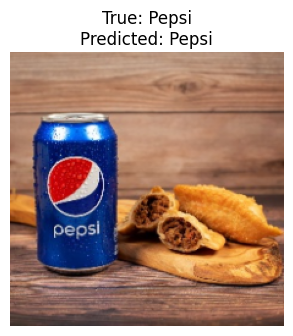

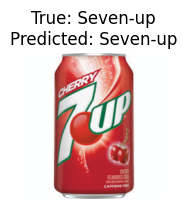

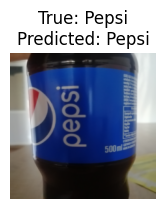

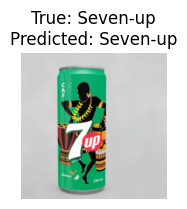

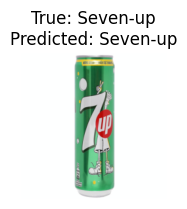

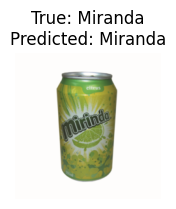

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to display image along with the title
def imshow(image, title=None):
    """Display an image tensor."""
    # Undo the normalization (reverse mean and std)
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)  # Ensure values are between 0 and 1
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')  # Hide axis
    plt.pause(0.001)  # Pause for a short time so the plot updates

# Function to show random images along with true and predicted labels
def show_random_prediction():
    model.eval()  # Set the model to evaluation mode

    # Load one random batch from validation data
    inputs, labels = next(iter(val_loader))
    inputs, labels = inputs.to(device), labels.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    # Move inputs, labels, and predictions back to CPU for visualization
    inputs = inputs.cpu()
    labels = labels.cpu()
    preds = preds.cpu()

    # Display multiple images along with their predictions
    plt.figure(figsize=(12, 12))

    # Show 6 random images from the batch
    for i in range(6):  # Showing 6 images
        rand_idx = np.random.randint(0, len(inputs))  # Pick a random index

        plt.subplot(2, 3, i+1)  # Create a 2x3 grid of images

        imshow(inputs[rand_idx],
               title=f"True: {dataset.classes[labels[rand_idx]]}\nPredicted: {dataset.classes[preds[rand_idx]]}")

    plt.show()

# Call the function to show random predictions
show_random_prediction()


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# code to use saving model
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # 3 classes
model.load_state_dict(torch.load('/content/drive/MyDrive/data/Final Project /Soda_drinks_best_model.pth'))
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-8-7d32df6fa578>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions 

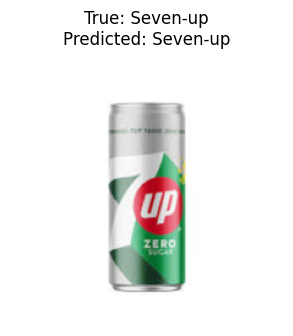

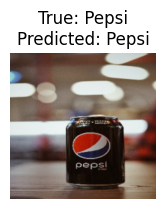

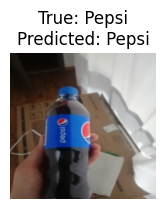

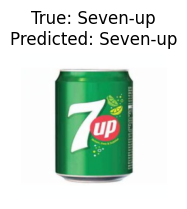

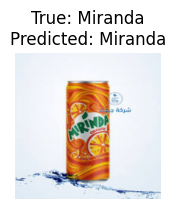

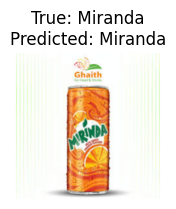

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to display image along with the title
def imshow(image, title=None):
    """Display an image tensor."""
    # Undo the normalization (reverse mean and std)
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)  # Ensure values are between 0 and 1
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')  # Hide axis
    plt.pause(0.001)  # Pause for a short time so the plot updates

# Function to show random images along with true and predicted labels
def show_random_prediction():
    model.eval()  # Set the model to evaluation mode

    # Load one random batch from validation data
    inputs, labels = next(iter(val_loader))
    inputs, labels = inputs.to(device), labels.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    # Move inputs, labels, and predictions back to CPU for visualization
    inputs = inputs.cpu()
    labels = labels.cpu()
    preds = preds.cpu()

    # Display multiple images along with their predictions
    plt.figure(figsize=(12, 12))

    # Show 6 random images from the batch
    for i in range(6):  # Showing 6 images
        rand_idx = np.random.randint(0, len(inputs))  # Pick a random index

        plt.subplot(2, 3, i+1)  # Create a 2x3 grid of images

        imshow(inputs[rand_idx],
               title=f"True: {dataset.classes[labels[rand_idx]]}\nPredicted: {dataset.classes[preds[rand_idx]]}")

    plt.show()

# Call the function to show random predictions
show_random_prediction()


In [ ]:
import shutil

# Define source and destination paths
source_path = '/content/best_model.pth'
destination_path = '/content/drive/MyDrive/data/Final Project /Soda_drinks_best_model.pth'

# Copy the file
shutil.copy(source_path, destination_path)

print(f'File copied from {source_path} to {destination_path}')

File copied from /content/best_model.pth to /content/drive/MyDrive/data/Final Project /Soda_drinks_best_model.pth
